# Curves

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import scienceplots

In [2]:
%matplotlib inline

In [3]:
load = pd.read_excel("./../cases/DataLoad.xlsx")
pv = pd.read_excel("./../cases/DataPV.xlsx")
wind = pd.read_excel("./../cases/DataWind.xlsx")

In [4]:
curve = pd.DataFrame()
curve["Time"] = pd.date_range(start="2024-02-01 00:00:00",
                              end="2024-02-01 23:59:00",
                              freq="min").time
curve["Load"] = load["Total_Power"].values[:1440]
curve["PV"] = pv["Power"].values[:1440]
curve["Wind"] = wind["Power"].values[:1440]

scaler = MinMaxScaler(feature_range=(0.7, 1.2))
curve[["Load", "PV", "Wind"]] = scaler.fit_transform(curve[["Load", "PV", "Wind"]])

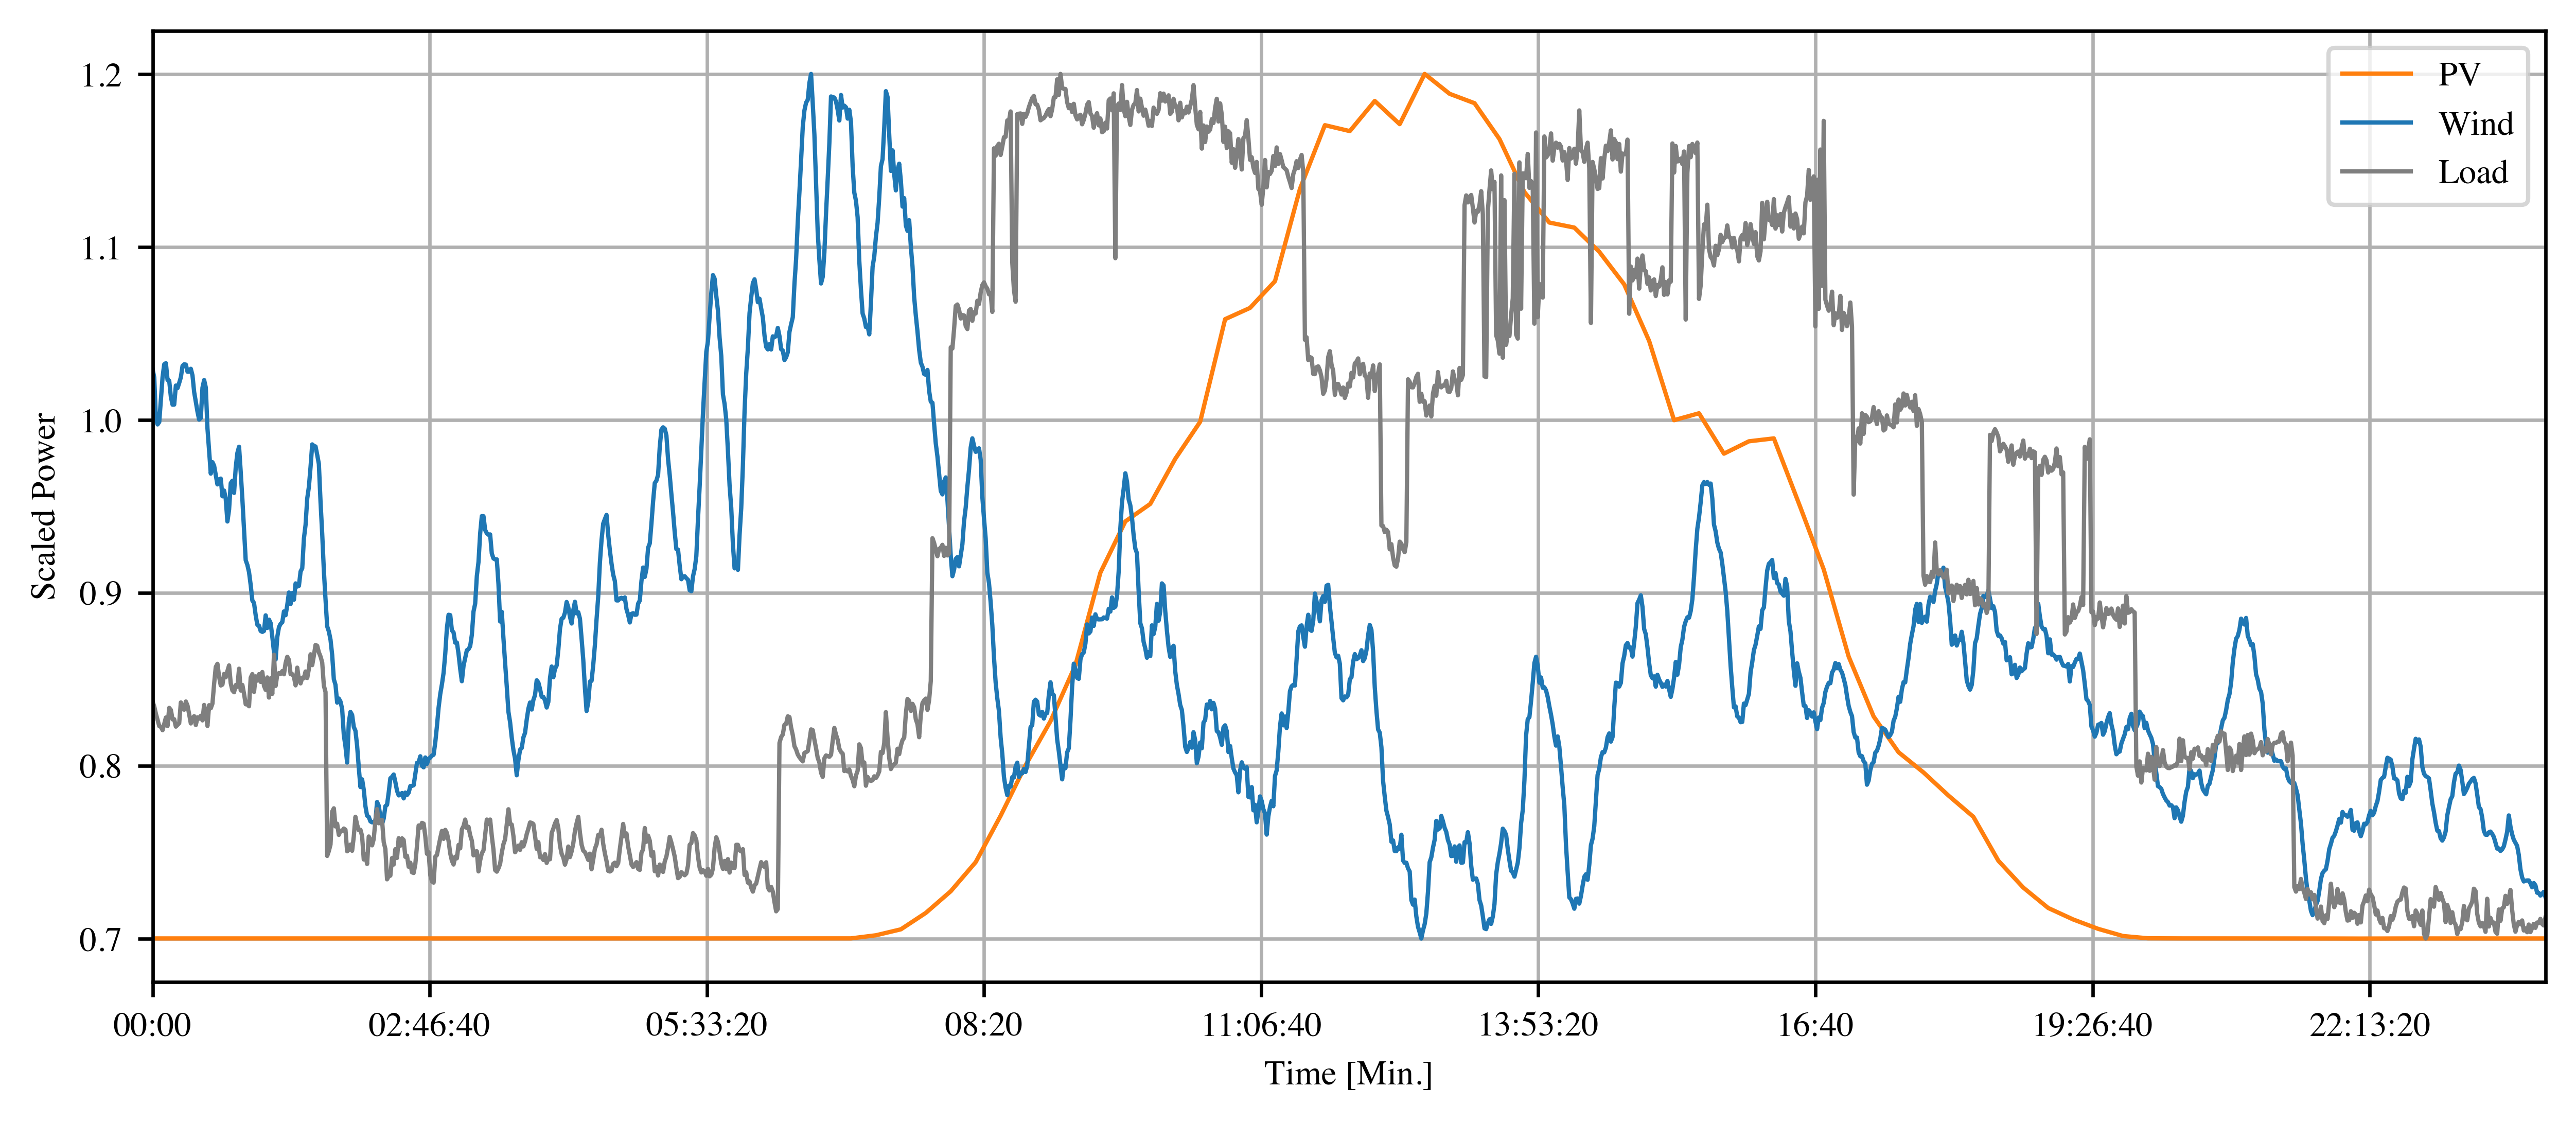

In [5]:
plt.style.use(['default', 'ieee'])

ax = curve.plot(x='Time', y=['PV', 'Wind', 'Load'],
                color=['tab:orange', 'tab:blue', 'tab:gray'],
                style=['-', '-', '-'],
                linewidth=1,
                figsize=(10, 4),)
_ = ax.legend(labels=['PV', 'Wind', 'Load'])
_ = ax.grid()
_ = ax.set_xlabel("Time [Min.]")
_ = ax.set_ylabel("Scaled Power")
_ = ax.set_xlim([curve["Time"].min(), curve["Time"].max()])

In [6]:
curve.to_csv("./../cases/Curve.csv", index=False)